# Descriptive and Basic Statistical Analysis: ChatGPT Reviews on Google Play

This notebook presents a descriptive and basic statistical analysis of user reviews for the ChatGPT mobile application collected from Google Play.

The goal of this analysis is to understand the basic characteristics of the dataset in practice, including:
- rating and text-length distributions,
- temporal trends in review volume, and
- potential data quality issues that should be considered before downstream modeling.


In [21]:
import pandas as pd

df = pd.read_csv("google_play_chatgpt_reviews.csv")

## Data Overview and Integrity Checks

We first examine the overall size of the dataset and verify record uniqueness to ensure that the data collection process produced a stable and non-duplicated sample.

In [22]:
print("Total rows:", len(df))
print("Unique review_id:", df["review_id"].nunique())

Total rows: 100000
Unique review_id: 100000


## Missing Values and Field Completeness

This section evaluates the completeness of key fields, including review content, ratings, and metadata such as app version.

In [23]:
df.isna().sum()

review_id         0
user_name         0
rating            0
content           1
thumbs_up         0
review_date       0
app_version    6024
dtype: int64

## Rating Distribution

Understanding the distribution of user ratings provides insight into overall sentiment and potential skewness in user feedback.

In [24]:
df["rating"].value_counts().sort_index()

rating
1     6214
2     1747
3     4126
4    10039
5    77874
Name: count, dtype: int64

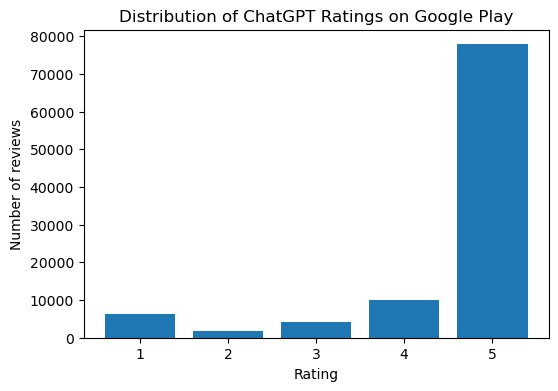

In [25]:
import matplotlib.pyplot as plt

rating_counts = df["rating"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Number of reviews")
plt.title("Distribution of ChatGPT Ratings on Google Play")
plt.show()


The distribution is heavily right-skewed, with most reviews rated 5 stars, while lower-rated reviews remain sufficiently represented for qualitative analysis.


## Review Length Distribution

Review length serves as a proxy for information density in user feedback and helps identify the prevalence of short versus detailed reviews.


In [26]:
df["content_len"] = df["content"].astype(str).str.len()
df["content_len"].describe()

count    100000.000000
mean         28.394740
std          56.329281
min           1.000000
25%           5.000000
50%          11.000000
75%          26.000000
max         500.000000
Name: content_len, dtype: float64

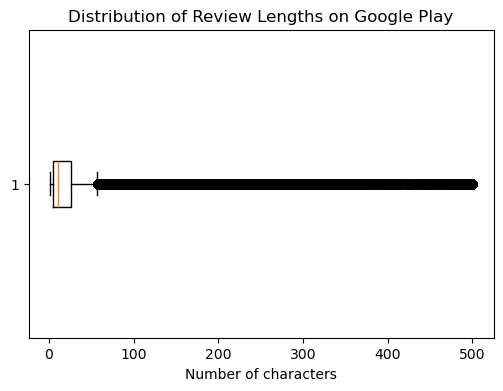

In [27]:
plt.figure(figsize=(6,4))
plt.boxplot(df["content_len"], vert=False)
plt.xlabel("Number of characters")
plt.title("Distribution of Review Lengths on Google Play")
plt.show()


Review lengths exhibit a strongly long-tailed distribution, indicating that while most feedback is brief, a subset of reviews contains substantially richer contextual detail.


## Temporal Trends in Review Volume

We examine the daily volume of reviews over time to assess data coverage, collection stability, and potential temporal anomalies.


In [28]:
df["review_date"] = pd.to_datetime(df["review_date"])
print(df["review_date"].min(), "→", df["review_date"].max())

2026-01-10 06:12:47 → 2026-02-06 12:24:11


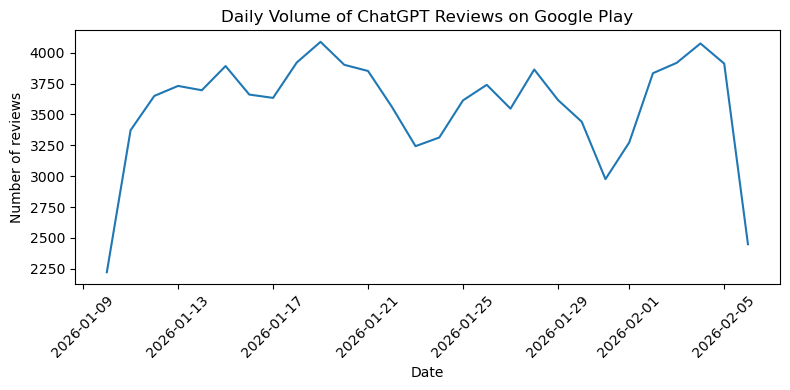

In [29]:
df["review_date"] = pd.to_datetime(df["review_date"])
daily_counts = (
    df.groupby(df["review_date"].dt.date)
      .size()
)

plt.figure(figsize=(8,4))
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel("Date")
plt.ylabel("Number of reviews")
plt.title("Daily Volume of ChatGPT Reviews on Google Play")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Daily review volume remains broadly stable across the observed period. A decline on the final day reflects partial-day data collection rather than a data ingestion issue.


## Summary and Data Quality Considerations

Overall, the Google Play ChatGPT review dataset contains a large and clean sample of user feedback, with minimal missing values in critical fields and stable temporal coverage.

Key data characteristics include:
- a heavily right-skewed rating distribution,
- a long-tailed review length distribution, and
- consistent daily review volume across the collection period.

The primary limitation of this dataset is its limited historical coverage, as reviews span approximately one month. Nevertheless, the dataset is well-suited for descriptive analysis and downstream tasks such as sentiment analysis or issue mining.
